# Case Study: Medifor
This notebook looks at the differences between different train and test datasets.

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts

from scripts import clustering
from scripts.plot import plot_clustering

from scripts import misclassification

from scripts import removal
from scripts.plot import plot_removal

tree_kernel='leaf_output'
data_dir='../../data/'

## Feature Clustering
We can use tsne to visualize the domain mismatch in our high-dimensional medifor datasets. We'll take our train and test sets, concatenate them, extract the tree representation features, reduce their dimensionality using PCA, and then embed them into a 2D space using TSNE.

### Original features
We first plot the similarity between data points using the original feature space:

In [11]:
args = clustering.Args()
args.dataset='adult'
args.tree_type='cb'
args.tree_kernel='None'
args.data_dir=data_dir
clustering.main(args)

train instances: 32561
test instances: 16281
no. features: 14
concatenating X_train and X_test...
embedding with tsne...


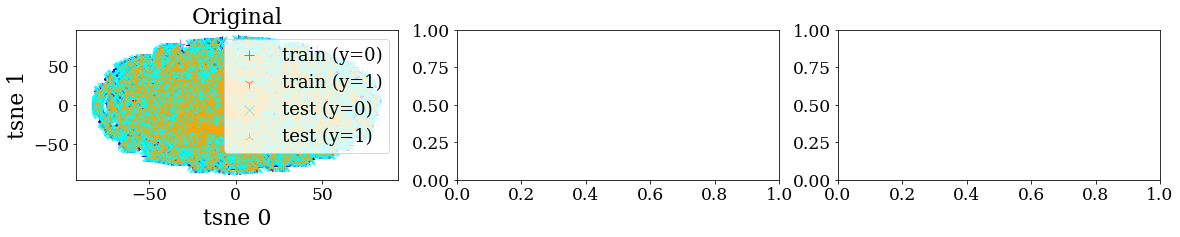

In [12]:
args = plot_clustering.Args()
args.dataset=['adult']
args.tree_type='cb'
args.tree_kernel='None'
args.data_dir=data_dir
plot_clustering.main(args)

### Tree-kernel latent space
Now we perform the same procedure, except this time with the tree-extracted feature representation:

In [13]:
args = clustering.Args()
args.dataset='adult'
args.tree_type='cb'
args.tree_kernel=tree_kernel
args.data_dir=data_dir
clustering.main(args)

train instances: 32561
test instances: 16281
no. features: 14
concatenating X_train and X_test...
transforming features with TREX...
PCA 100 to 50...
embedding with tsne...


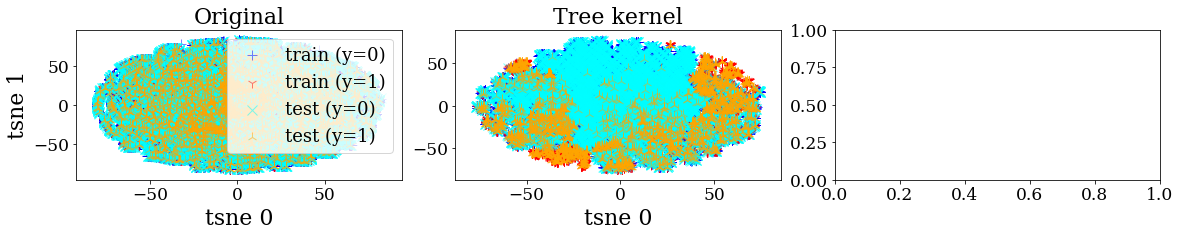

In [14]:
args = plot_clustering.Args()
args.dataset=['adult']
args.tree_type='cb'
args.tree_kernel=tree_kernel
args.data_dir=data_dir
plot_clustering.main(args)

### Different train and test sets
Now we apply the same process to two slightly different datasets: NC17 (train) and MFC18 (test), where we can see there is a clear separation between the positive and negative classes for the training set, but not for the test set:

In [ ]:
args = clustering.Args()
args.dataset='mfc19_mfc20'
args.tree_type='lgb'
args.tree_kernel=tree_kernel
args.data_dir=data_dir
clustering.main(args)

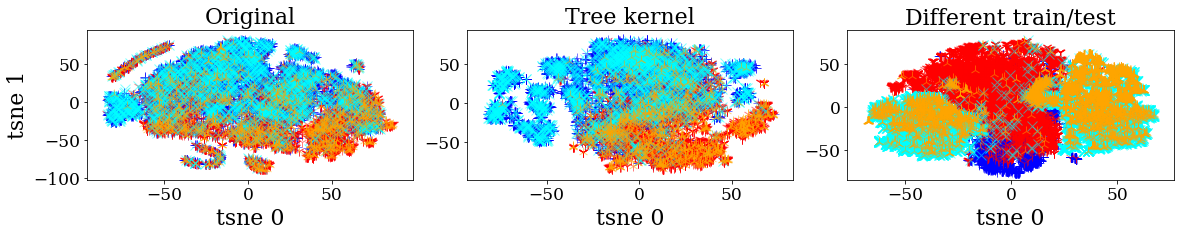

In [6]:
args = plot_clustering.Args()
args.dataset=['MFC19_EvalPart1', 'mfc19_mfc20']
args.tree_type='lgb'
args.tree_kernel=tree_kernel
args.data_dir=data_dir
plot_clustering.main(args)

## Understanding Misclassified Test Instances
This section analyzes an incorrectly predicted test instance from different perspectives.

train shape: (32264, 14)
test shape: (16281, 14)
no. features: 14
y_train label1: 7,924
y_test label1: 3,846
training the tree ensemble...

train acc: 0.876, auc: 0.932, logloss: 0.276
test  acc: 0.856, auc: 0.911, logloss: 0.307
output/misclassification/adult/cb/tree_output/rs2/../models/explainer.pkl
loading TREX model from output/misclassification/adult/cb/tree_output/rs2/../models/explainer.pkl...

generating tree predictions...
time: 0.090s
generating tree probabilities...
time: 0.074s
wrong - label0: 930, label1: 1418, total: 2348

test index: 14401, label: 0
tree pred: 1.0 (0.772)
TREX pred: 1.0 (0.556)

computing SHAP values for x_test...
train on a random subset of data
0.55: 32,264 -> 17,745

train acc: 0.876, auc: 0.932, logloss: 0.276
test  acc: 0.856, auc: 0.911, logloss: 0.307

train acc: 0.870, auc: 0.926, logloss: 0.286
test  acc: 0.852, auc: 0.907, logloss: 0.315

training 2 different LR models


/Users/Jonny/Documents/research/interpretability/classification/trees/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Jonny/Documents/research/interpretability/classification/trees/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



train acc: 0.786, auc: 0.730, logloss: 0.484
test  acc: 0.791, auc: 0.734, logloss: 0.473

train acc: 0.790, auc: 0.703, logloss: 0.490
test  acc: 0.796, auc: 0.705, logloss: 0.480

collecting results...
test 14401
{'age': 17.0, 'workclass': 4.0, 'fnlwgt': 73820.0, 'education': 2.0, 'education-num': 8.0, 'marital-status': 4.0, 'occupation': 12.0, 'relationship': 3.0, 'race': 4.0, 'sex': 0.0, 'capital-gain': 0.0, 'capital-loss': 0.0, 'hours-per-week': 8.0, 'native-country': 39.0}


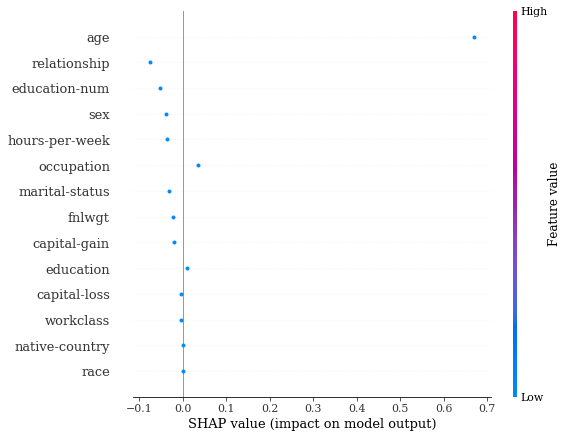

n_points w/ sim > 2.35: 98
n_age17_points w/ sim > 2.5: 98
train 24512, label: 1, weight: 0.006001, sim: 4.161912293974476, contribution (normalized): 0.0019803272960687746
  age: 17.0
  workclass: 4.0
  fnlwgt: 276718.0
  education: 11.0
  education-num: 9.0
  marital-status: 4.0
  occupation: 1.0
  relationship: 3.0
  race: 4.0
  sex: 1.0
  capital-gain: 0.0
  capital-loss: 0.0
  hours-per-week: 20.0
  native-country: 39.0
train 10200, label: 1, weight: 0.00603327, sim: 4.109928513919447, contribution (normalized): 0.0019661083711041204
  age: 17.0
  workclass: 4.0
  fnlwgt: 234780.0
  education: 11.0
  education-num: 9.0
  marital-status: 4.0
  occupation: 5.0
  relationship: 3.0
  race: 2.0
  sex: 1.0
  capital-gain: 0.0
  capital-loss: 0.0
  hours-per-week: 40.0
  native-country: 39.0
train 16688, label: 1, weight: 0.00577026, sim: 4.2083588587235, contribution (normalized): 0.001925433712311561
  age: 17.0
  workclass: 4.0
  fnlwgt: 108909.0
  education: 11.0
  education-num: 9.0

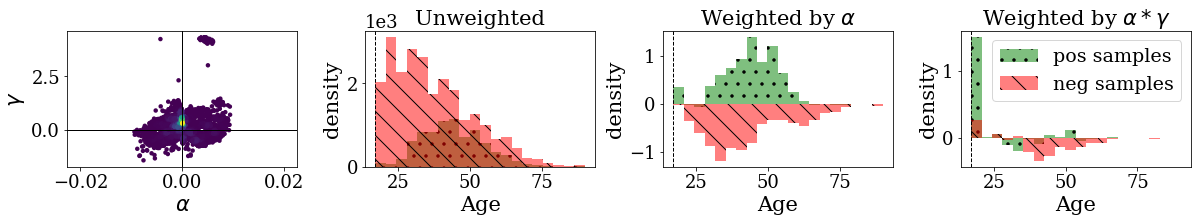

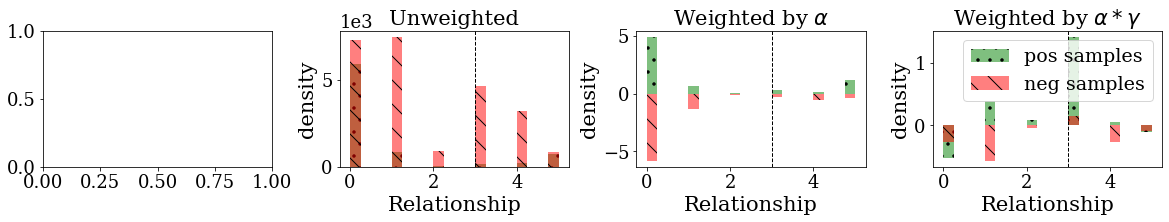

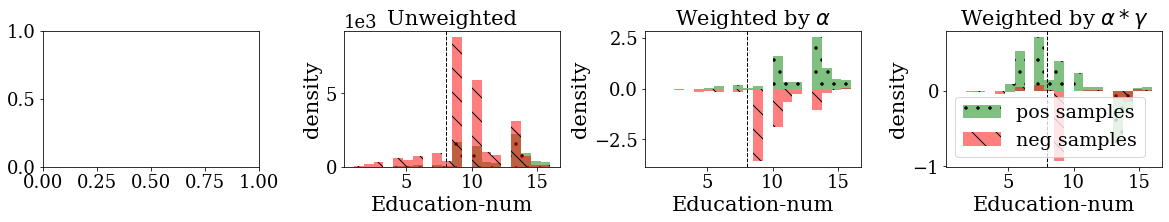

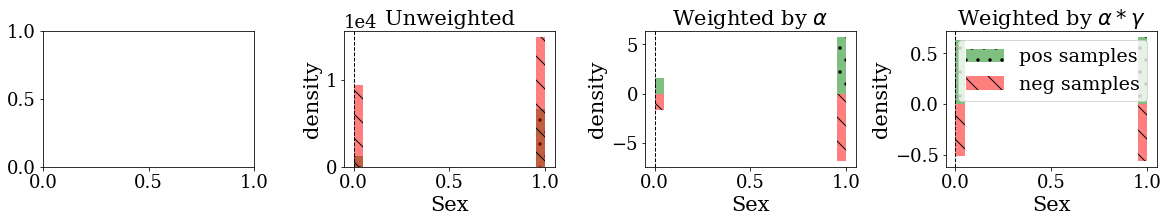

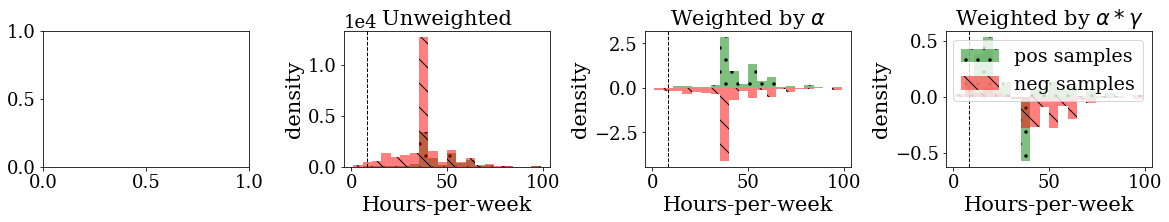

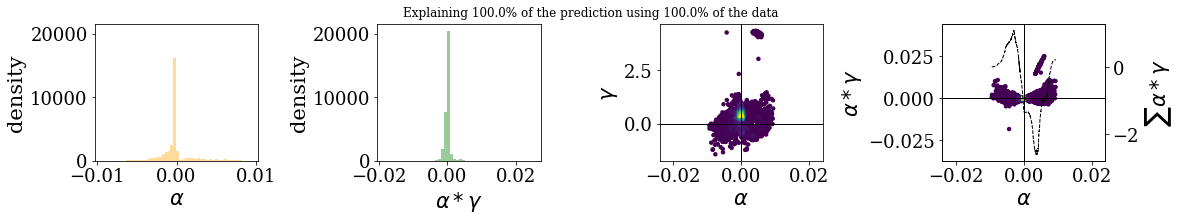

In [2]:
args = misclassification.Args()
args.dataset='adult'
args.tree_type='cb'
args.n_estimators=100
args.max_depth=5
args.tree_kernel='tree_output'
args.kernel_model='lr'
args.data_dir=data_dir
args.xlim=None
args.max_bins=20
args.kde=False
args.overlay=False
args.topk=5
args.test_type='neg_correct'
args.alpha=0.5
args.rs=2
args.load_trex=True
args.normalize_shap=True
args.coverage=1.0
args.surplus=None
args.max_contribution=0.0025
args.s_frac=0.55
args.rasterize=True
args.ext='pdf'
misclassification.main(args)

## Removing Harmful Training Samples
This section randomly samples a fraction of the misclassified test instances, computes the sum contributions of each training sample to those instances, and removes the ones (in batches) with the highest negative contributions. The model is then retrained after each removal and it's performance on the test set is computed.

In [ ]:
args = removal.Args()
args.dataset='nc17_mfc18'
args.tree_type='lgb'
args.tree_kernel='leaf_output'
args.data_dir=data_dir
args.n_iterations=4
args.n_remove=50
args.repeats=20
removal.main(args)

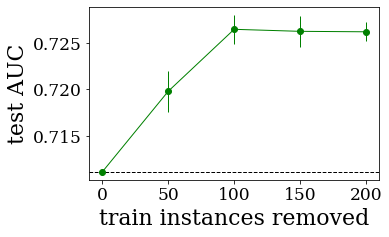

In [3]:
args = plot_removal.Args()
args.dataset='nc17_mfc18'
args.tree_type=tree_type
args.tree_kernel=tree_kernel
plot_removal.main(args)